In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import multiprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

from sklearn.svm import SVR,SVC
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.manifold import TSNE

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/편집데이터.csv')
df

,년,월,일,Solar radiation,Tmax,Tmin,Precipiation,Humidity,Windspeed,단면or양면,차광율,발전량,모듈 단위 발전량
0,2020,6,13,2.053739,29.12,22.20,50.2,85.562125,1.977031,1,0.32,69.842929,0.997756
1,2020,6,14,1.405904,26.30,21.60,42.8,85.181196,1.616806,1,0.32,47.811548,0.683022
2,2020,6,15,6.178615,31.74,17.20,0.0,68.896728,1.627951,1,0.32,210.120487,3.001721
3,2020,6,16,5.746005,32.50,18.00,0.0,67.463369,1.835434,1,0.32,195.408398,2.791549
4,2020,6,17,3.136012,28.86,18.18,4.4,74.592449,1.514601,1,0.32,106.648534,1.523550
...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,2020,10,16,1.414246,18.90,5.70,0.0,65.138326,1.280156,2,0.21,26.630512,0.760872
776,2020,10,17,3.522972,23.60,4.60,0.0,63.536590,1.847083,2,0.21,66.338222,1.895378
777,2020,10,18,3.433689,23.30,4.60,0.0,39.393374,1.515399,2,0.21,64.657013,1.847343
778,2020,10,19,3.206804,23.90,4.30,0.0,52.654370,1.183490,2,0.21,60.384730,1.725278


In [4]:
df.columns

Index(['년', '월', '일', 'Solar radiation', 'Tmax', 'Tmin', 'Precipiation',
       'Humidity', 'Windspeed', '단면or양면', '차광율', '발전량', '모듈 단위 발전량'],
      dtype='object')

In [5]:
df["발전량"].describe()

count    780.000000
mean      88.968863
std       46.725600
min        6.103421
25%       52.211445
50%       84.450030
75%      121.930918
max      232.688984
Name: 발전량, dtype: float64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   년                780 non-null    int64  
 1   월                780 non-null    int64  
 2   일                780 non-null    int64  
 3   Solar radiation  780 non-null    float64
 4   Tmax             780 non-null    float64
 5   Tmin             780 non-null    float64
 6   Precipiation     780 non-null    float64
 7   Humidity         780 non-null    float64
 8   Windspeed        780 non-null    float64
 9   단면or양면           780 non-null    int64  
 10  차광율              780 non-null    float64
 11  발전량              780 non-null    float64
 12  모듈 단위 발전량        780 non-null    float64
dtypes: float64(9), int64(4)
memory usage: 79.3 KB


In [7]:
df["발전량"].unique()

array([ 69.8429291 ,  47.81154829, 210.1204872 , 195.4083982 ,
       106.6485336 ,  28.7540993 , 175.0026693 , 165.5951682 ,
       168.587781  , 193.6377655 , 187.4949698 ,  41.72073447,
        47.16096263, 165.1378901 , 152.6589911 , 194.4544495 ,
        39.57404546,  72.64832594, 172.8406508 , 112.1531004 ,
        40.9132569 ,  66.43189425, 106.5753204 ,  58.06600052,
       183.8298688 , 164.3017614 , 140.7659207 ,  90.26825948,
       114.4228924 ,  32.25726272,  44.58098714,  35.03583951,
        36.70014669, 166.5573589 , 155.1340992 , 114.4040403 ,
       101.6433909 ,  88.78759388, 144.9561866 ,  40.96692992,
        32.92129999,  56.01688885,  62.67877511, 128.3315234 ,
        70.96216321,  76.41219255,  47.10694588,  97.07009482,
       142.2838469 , 100.2798301 , 105.4652647 , 115.2987385 ,
       161.9208529 , 111.3468961 ,  22.04696888,  12.20684144,
        31.43819471, 152.2062582 ,  41.04499977,  82.69570621,
       103.0499789 , 142.3168935 , 155.230134  , 189.05

In [8]:
X = df.iloc[:,:-2]
y = df.iloc[:,-2]

In [9]:
X

,년,월,일,Solar radiation,Tmax,Tmin,Precipiation,Humidity,Windspeed,단면or양면,차광율
0,2020,6,13,2.053739,29.12,22.20,50.2,85.562125,1.977031,1,0.32
1,2020,6,14,1.405904,26.30,21.60,42.8,85.181196,1.616806,1,0.32
2,2020,6,15,6.178615,31.74,17.20,0.0,68.896728,1.627951,1,0.32
3,2020,6,16,5.746005,32.50,18.00,0.0,67.463369,1.835434,1,0.32
4,2020,6,17,3.136012,28.86,18.18,4.4,74.592449,1.514601,1,0.32
...,...,...,...,...,...,...,...,...,...,...,...
775,2020,10,16,1.414246,18.90,5.70,0.0,65.138326,1.280156,2,0.21
776,2020,10,17,3.522972,23.60,4.60,0.0,63.536590,1.847083,2,0.21
777,2020,10,18,3.433689,23.30,4.60,0.0,39.393374,1.515399,2,0.21
778,2020,10,19,3.206804,23.90,4.30,0.0,52.654370,1.183490,2,0.21


In [10]:
y

0       69.842929
1       47.811548
2      210.120487
3      195.408398
4      106.648534
          ...    
775     26.630512
776     66.338222
777     64.657013
778     60.384730
779     68.794210
Name: 발전량, Length: 780, dtype: float64

In [11]:
# 데이터 전처리 StandardScaler

X = df.iloc[:,:-2]
y = df.iloc[:,-2]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

linear_svr=SVR(kernel='linear')
linear_svr.fit(X_train,y_train)

print("Linear SVR 학습데이터 점수: {}".format(linear_svr.score(X_train,y_train)))
print("Linear SVR 평가데이터 점수: {}".format(linear_svr.score(X_test,y_test)))

poly_svr=SVR(kernel='poly')
poly_svr.fit(X_train,y_train)

print("poly SVR 학습데이터 점수: {}".format(poly_svr.score(X_train,y_train)))
print("poly SVR 평가데이터 점수: {}".format(poly_svr.score(X_test,y_test)))

rbf_svr=SVR(kernel='rbf')
rbf_svr.fit(X_train,y_train)

print("RBF SVR 학습데이터 점수: {}".format(rbf_svr.score(X_train,y_train)))
print("RBF SVR 평가데이터 점수: {}".format(rbf_svr.score(X_test,y_test)))

Linear SVR 학습데이터 점수: 0.9153466338583311
Linear SVR 평가데이터 점수: 0.8890798068745062
poly SVR 학습데이터 점수: 0.5569651345825888
poly SVR 평가데이터 점수: 0.5449684951575844
RBF SVR 학습데이터 점수: 0.7386117419208402
RBF SVR 평가데이터 점수: 0.7291874441315693


In [12]:
# 데이터 전처리 MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

linear_svr=SVR(kernel='linear')
linear_svr.fit(X_train,y_train)

print("Linear SVR 학습데이터 점수: {}".format(linear_svr.score(X_train,y_train)))
print("Linear SVR 평가데이터 점수: {}".format(linear_svr.score(X_test,y_test)))

poly_svr=SVR(kernel='poly')
poly_svr.fit(X_train,y_train)

print("poly SVR 학습데이터 점수: {}".format(poly_svr.score(X_train,y_train)))
print("poly SVR 평가데이터 점수: {}".format(poly_svr.score(X_test,y_test)))

rbf_svr=SVR(kernel='rbf')
rbf_svr.fit(X_train,y_train)

print("RBF SVR 학습데이터 점수: {}".format(rbf_svr.score(X_train,y_train)))
print("RBF SVR 평가데이터 점수: {}".format(rbf_svr.score(X_test,y_test)))

Linear SVR 학습데이터 점수: 0.8349154502290481
Linear SVR 평가데이터 점수: 0.8526006989210583
poly SVR 학습데이터 점수: 0.9629025679108191
poly SVR 평가데이터 점수: 0.956016458796655
RBF SVR 학습데이터 점수: 0.7081420062976234
RBF SVR 평가데이터 점수: 0.7164955576280951


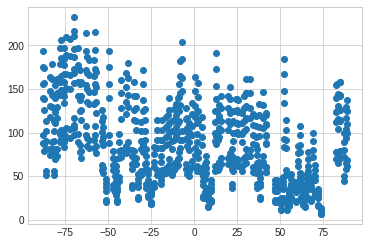

In [13]:
# StandardScaler

X = df.iloc[:,:-2]
y = df.iloc[:,-2]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = SVR(kernel='linear')
model.fit(X_train,y_train)

X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp,y)

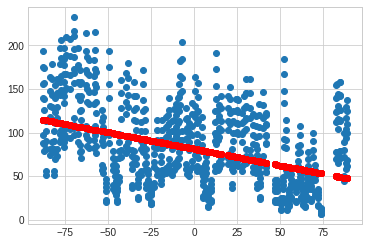

In [14]:
model.fit(X_comp,y)
predict = model.predict(X_comp)
plt.scatter(X_comp,y)
plt.scatter(X_comp,predict,color='r')

In [22]:
estimator = make_pipeline(StandardScaler(),SVR(kernel='linear'))
cross_validate(estimator=estimator,X=X,y=y,cv=2,n_jobs=multiprocessing.cpu_count(),verbose=True)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    1.1s finished


{'fit_time': array([0.02036524, 0.02336264]),
 'score_time': array([0.00611949, 0.00579619]),
 'test_score': array([0.80491008, 0.91021648])}

In [55]:
pipe = Pipeline([('scaler',StandardScaler()),('model',SVR(kernel='linear'))])

param_grid = [{'model__kernel':['rbf','polynomial','linear']}]

gs = GridSearchCV(estimator=pipe, param_grid=param_grid, n_jobs=multiprocessing.cpu_count(), cv=2, verbose=True)

gs.fit(X,y)

Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   6 out of   6 | elapsed:    0.1s finished


GridSearchCV(cv=2, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVR(C=1.0, cache_size=200, coef0=0.0,
                                            degree=3, epsilon=0.1,
                                            gamma='scale', kernel='linear',
                                            max_iter=-1, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=2,
             param_grid=[{'model__kernel': ['rbf', 'polynomial', 'linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
 

In [56]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma='scale', kernel='linear', max_iter=-1,
                     shrinking=True, tol=0.001, verbose=False))],
         verbose=False)

In [57]:
# kernel = linear

pipe = Pipeline([('scaler',StandardScaler()),('model',SVR(kernel='linear'))])
param_grid = [{'model__gamma':['scale','auto'],'model__C':[1.0, 0.1, 0.01],'model__epsilon':[1.0,0.1,0.01]}]

gs = GridSearchCV(estimator=pipe, param_grid=param_grid, n_jobs=multiprocessing.cpu_count(), cv=2, verbose=True)

gs.fit(X,y)

Fitting 2 folds for each of 18 candidates, totalling 36 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  36 out of  36 | elapsed:    0.5s finished


GridSearchCV(cv=2, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVR(C=1.0, cache_size=200, coef0=0.0,
                                            degree=3, epsilon=0.1,
                                            gamma='scale', kernel='linear',
                                            max_iter=-1, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gam

In [58]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma='scale', kernel='linear', max_iter=-1,
                     shrinking=True, tol=0.001, verbose=False))],
         verbose=False)

In [59]:
model = gs.best_estimator_
model.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma='scale', kernel='linear', max_iter=-1,
                     shrinking=True, tol=0.001, verbose=False))],
         verbose=False)

In [60]:
print("학습데이터 점수: {}".format(model.score(X_train,y_train)))
print("평가데이터 점수: {}".format(model.score(X_test,y_test)))

학습데이터 점수: 0.9117027396827634
평가데이터 점수: 0.8959495459687403


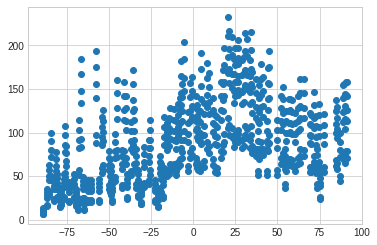

In [62]:
# MinMaxScaler

X = df.iloc[:,:-2]
y = df.iloc[:,-2]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = SVR(kernel='linear')
model.fit(X_train,y_train)

X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp,y)

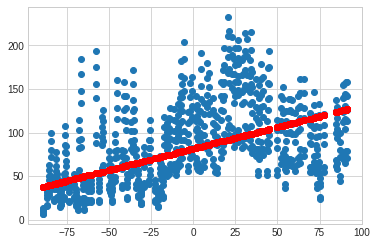

In [63]:
model.fit(X_comp,y)
predict = model.predict(X_comp)
plt.scatter(X_comp,y)
plt.scatter(X_comp,predict,color='r')

In [64]:
estimator = make_pipeline(StandardScaler(),SVR(kernel='linear'))
cross_validate(estimator=estimator,X=X,y=y,cv=2,n_jobs=multiprocessing.cpu_count(),verbose=True)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    1.1s finished


{'fit_time': array([0.02166843, 0.02295113]),
 'score_time': array([0.00611567, 0.00587749]),
 'test_score': array([0.80491008, 0.91021648])}

In [65]:
pipe = Pipeline([('scaler',StandardScaler()),('model',SVR(kernel='linear'))])

param_grid = [{'model__kernel':['rbf','polynomial','linear']}]

gs = GridSearchCV(estimator=pipe, param_grid=param_grid, n_jobs=multiprocessing.cpu_count(), cv=2, verbose=True)

gs.fit(X,y)

Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   6 out of   6 | elapsed:    0.1s finished


GridSearchCV(cv=2, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVR(C=1.0, cache_size=200, coef0=0.0,
                                            degree=3, epsilon=0.1,
                                            gamma='scale', kernel='linear',
                                            max_iter=-1, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=2,
             param_grid=[{'model__kernel': ['rbf', 'polynomial', 'linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
 

In [66]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma='scale', kernel='linear', max_iter=-1,
                     shrinking=True, tol=0.001, verbose=False))],
         verbose=False)

In [67]:
# kernel = linear

pipe = Pipeline([('scaler',StandardScaler()),('model',SVR(kernel='linear'))])
param_grid = [{'model__gamma':['scale','auto'],'model__C':[1.0, 0.1, 0.01],'model__epsilon':[1.0,0.1,0.01]}]

gs = GridSearchCV(estimator=pipe, param_grid=param_grid, n_jobs=multiprocessing.cpu_count(), cv=2, verbose=True)

gs.fit(X,y)

Fitting 2 folds for each of 18 candidates, totalling 36 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  36 out of  36 | elapsed:    0.5s finished


GridSearchCV(cv=2, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVR(C=1.0, cache_size=200, coef0=0.0,
                                            degree=3, epsilon=0.1,
                                            gamma='scale', kernel='linear',
                                            max_iter=-1, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gam

In [68]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma='scale', kernel='linear', max_iter=-1,
                     shrinking=True, tol=0.001, verbose=False))],
         verbose=False)

In [69]:
model = gs.best_estimator_
model.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma='scale', kernel='linear', max_iter=-1,
                     shrinking=True, tol=0.001, verbose=False))],
         verbose=False)

In [70]:
print("학습데이터 점수: {}".format(model.score(X_train,y_train)))
print("평가데이터 점수: {}".format(model.score(X_test,y_test)))

학습데이터 점수: 0.9130360599247161
평가데이터 점수: 0.9237098176637446
